# Import and Read Data  

In [1]:
#import all the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
#Load file with pandas
ames = pd.read_csv('./datasets/train.csv')

#Named this as kaggle because the above ames data will become train/test 
kaggle_test_ames = pd.read_csv('./datasets/test.csv') 

In [3]:
#check initial number of rows 
ames.shape

(2051, 81)

In [4]:
#check total columns 
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
#summary stats (compare max and min to the mean for outliers)
ames.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
#check the data types 
pd.set_option('max_rows', 100)
# ames.dtypes

# Data Cleaning 

Here I will clean both the train and (original) test data at the same time 

Data type conversions 

In [7]:
#MS Subclass should be object because these are codes (should not be agg)
ames['MS SubClass'] = ames['MS SubClass'].astype(str)

kaggle_test_ames['MS SubClass'] = kaggle_test_ames['MS SubClass'].astype(str)

#Lot Area and Lot frontage should be floats
ames['Lot Area'] = ames['Lot Area'].astype(float)
ames['Lot Frontage'] = ames['Lot Frontage'].astype(float)

kaggle_test_ames['Lot Area'] = kaggle_test_ames['Lot Area'].astype(float)
kaggle_test_ames['Lot Frontage'] = kaggle_test_ames['Lot Frontage'].astype(float)

Drop Columns 

In [8]:
ames['Misc Feature'].value_counts()
kaggle_test_ames['Misc Feature'].value_counts()
ames['Alley'].value_counts()
kaggle_test_ames['Alley'].value_counts()


#Misc Feature column - only ~3% of the homes have a misc feature, therefore I decided to remove to column. 
#Same for Alley - only 7% of the rows have data in this columns so I recommend to remove it. 
# Drop ID and PID (ID column will not be useful in our modeling, but I still need it on the test data to map predictions)


ames.drop(['Misc Feature','Alley','PID','Id'], axis =1, inplace=True)

kaggle_test_ames.drop(['Misc Feature','Alley','PID'], axis =1, inplace=True)

In [9]:
#Check the total columns after dropping 
print(ames.shape)
print(kaggle_test_ames.shape)

(2051, 77)
(879, 77)


Address NaN values 

In [10]:
#Check for NaNs
ames.isna().sum().sum()
kaggle_test_ames.isna().sum().sum()

2516

Numerical Columns with NaNs

In [11]:
# Because these are numerical, I decided to fill the NaNs with 0

ames.update(ames[['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Full Bath',
                  'Bsmt Half Bath', 'Bsmt Unf SF', 'Garage Area',
                  'Garage Cars', 'Mas Vnr Area','Total Bsmt SF',
                  'Lot Frontage','Garage Yr Blt']].fillna(0))

kaggle_test_ames.update(kaggle_test_ames[['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Full Bath',
                                          'Bsmt Half Bath', 'Bsmt Unf SF', 'Garage Area',
                                          'Garage Cars', 'Mas Vnr Area','Total Bsmt SF',
                                          'Lot Frontage','Garage Yr Blt']].fillna(0))

Categorical Columns with NaNs

In [12]:
# Because these are categorical (objects), I decided to fill NaN values with 'None'.

#change nominal NaN to 'None' so the column remains when we get dummies 

ames.update(ames[['Garage Finish','Garage Type','Mas Vnr Type']].fillna('None'))

kaggle_test_ames.update(kaggle_test_ames[['Garage Finish','Garage Type','Mas Vnr Type']].fillna('None'))

In [13]:
#change ordinal NaN to strings of the lowest rankings (i.e. 'No Garage')

ames['Utilities'].fillna(value= 'No Utilities', inplace=True)

ames.update(ames[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']].fillna('No Basement'))

ames['Fence'].fillna(value= 'No Fence', inplace=True)
ames['Fireplace Qu'].fillna(value= 'No Fireplace', inplace=True)
ames['Garage Cond'].fillna(value= 'No Garage', inplace=True)
ames['Garage Qual'].fillna(value= 'No Garage', inplace=True)
ames['Pool QC'].fillna(value= 'No Pool', inplace=True)
ames['Electrical'].fillna(value= 'No Electrical', inplace=True)
ames['Lot Shape'].fillna(value= 'No Lot Shape', inplace=True)
ames['Land Slope'].fillna(value= 'No Land Slope', inplace=True)
ames['Exter Qual'].fillna(value= 'No Exter Qual', inplace=True)
ames['Exter Cond'].fillna(value= 'No Exter Cond', inplace=True)
ames['Kitchen Qual'].fillna(value= 'No Kitchen Qual', inplace=True)
ames['Paved Drive'].fillna(value= 'No Paved Drive', inplace=True)


kaggle_test_ames['Utilities'].fillna(value= 'No Utilities', inplace=True)

kaggle_test_ames.update(kaggle_test_ames[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']].fillna('No Basement'))

kaggle_test_ames['Fence'].fillna(value= 'No Fence', inplace=True)
kaggle_test_ames['Fireplace Qu'].fillna(value= 'No Fireplace', inplace=True)
kaggle_test_ames['Garage Cond'].fillna(value= 'No Garage', inplace=True)
kaggle_test_ames['Garage Qual'].fillna(value= 'No Garage', inplace=True)
kaggle_test_ames['Pool QC'].fillna(value= 'No Pool', inplace=True)
kaggle_test_ames['Electrical'].fillna(value= 'No Electrical', inplace=True)
kaggle_test_ames['Lot Shape'].fillna(value= 'No Lot Shape', inplace=True)
kaggle_test_ames['Land Slope'].fillna(value= 'No Land Slope', inplace=True)
kaggle_test_ames['Exter Qual'].fillna(value= 'No Exter Qual', inplace=True)
kaggle_test_ames['Exter Cond'].fillna(value= 'No Exter Cond', inplace=True)
kaggle_test_ames['Kitchen Qual'].fillna(value= 'No Kitchen Qual', inplace=True)
kaggle_test_ames['Paved Drive'].fillna(value= 'No Paved Drive', inplace=True)


In [14]:
#Check the nulls 
print(ames.isna().sum().sum())
print(kaggle_test_ames.isna().sum().sum())

0
0


Now that I have removed the NaNs from the data, I must apply the rankings to the ordinal columns

In [15]:
#Create dictionaries for the ordinal column rankings 

utilities_ranks = {'AllPub':2, 'NoSewr': 1, 'NoSeWa' : 0}
bsmt_qual_ranks = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0}
bsmt_cond_ranks = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0}
bsmt_exposure_ranks = {'Gd':4, 'Av': 3, 'Mn':2, 'No':1, 'No Basement':0}
bsmt_fin_type1_ranks = {'GLQ':6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}
bsmt_fin_type2_ranks = {'GLQ':6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}
fireplace_qu_ranks = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'No Fireplace':0}
garage_cqual_ranks = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0}
garage_cond_ranks = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0}
pool_qc_ranks = {'Ex': 4, 'Gd':3, 'TA':2, 'Fa':1, 'No Pool':0}
fence_ranks = {'GdPrv': 4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'No Fence':0}
electrical_ranks = {'ABrkr': 4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mixed':0}
lot_shape_ranks = {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}
heating_qc_ranks = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'No Heating':0}
land_slope_ranks = {'Gtl':2, 'Mod': 1, 'Sev' : 0}
exter_qual_ranks = {'Ex':4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po':0}
exter_cond_ranks = {'Ex':4, 'Gd': 3, 'TA':2 ,'Fa':1, 'Po':0}
kitchen_qual_ranks = {'Ex':4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po':0}
paved_drive_ranks = {'Y':2, 'P':1, 'N':0}


In [16]:
#Map rank dictionaries to ordinal columns 

ames['Utilities'] = ames['Utilities'].map(utilities_ranks).fillna(0)
ames['Bsmt Qual'] = ames['Bsmt Qual'].map(bsmt_qual_ranks)
ames['Bsmt Cond'] = ames['Bsmt Cond'].map(bsmt_cond_ranks)
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].map(bsmt_exposure_ranks)
ames['BsmtFin Type 1'] = ames['BsmtFin Type 1'].map(bsmt_fin_type1_ranks)
ames['BsmtFin Type 2'] = ames['BsmtFin Type 2'].map(bsmt_fin_type2_ranks)
ames['Fireplace Qu'] = ames['Fireplace Qu'].map(fireplace_qu_ranks)
ames['Garage Cond'] = ames['Garage Cond'].map(garage_cqual_ranks)
ames['Garage Qual'] = ames['Garage Qual'].map(garage_cond_ranks)
ames['Pool QC'] = ames['Pool QC'].map(pool_qc_ranks)
ames['Fence'] = ames['Fence'].map(fence_ranks)
ames['Electrical'] = ames['Electrical'].map(electrical_ranks).fillna(0)
ames['Lot Shape'] = ames['Lot Shape'].map(lot_shape_ranks)
ames['Heating QC'] = ames['Heating QC'].map(heating_qc_ranks)
ames['Land Slope'] = ames['Land Slope'].map(land_slope_ranks)
ames['Exter Qual'] = ames['Exter Qual'].map(exter_qual_ranks)
ames['Exter Cond'] = ames['Exter Cond'].map(exter_cond_ranks)
ames['Kitchen Qual'] = ames['Kitchen Qual'].map(kitchen_qual_ranks)
ames['Paved Drive'] = ames['Paved Drive'].map(paved_drive_ranks)


kaggle_test_ames['Utilities'] = kaggle_test_ames['Utilities'].map(utilities_ranks).fillna(0)
kaggle_test_ames['Bsmt Qual'] = kaggle_test_ames['Bsmt Qual'].map(bsmt_qual_ranks)
kaggle_test_ames['Bsmt Cond'] = kaggle_test_ames['Bsmt Cond'].map(bsmt_cond_ranks)
kaggle_test_ames['Bsmt Exposure'] = kaggle_test_ames['Bsmt Exposure'].map(bsmt_exposure_ranks)
kaggle_test_ames['BsmtFin Type 1'] = kaggle_test_ames['BsmtFin Type 1'].map(bsmt_fin_type1_ranks)
kaggle_test_ames['BsmtFin Type 2'] = kaggle_test_ames['BsmtFin Type 2'].map(bsmt_fin_type2_ranks)
kaggle_test_ames['Fireplace Qu'] = kaggle_test_ames['Fireplace Qu'].map(fireplace_qu_ranks)
kaggle_test_ames['Garage Cond'] = kaggle_test_ames['Garage Cond'].map(garage_cqual_ranks)
kaggle_test_ames['Garage Qual'] = kaggle_test_ames['Garage Qual'].map(garage_cond_ranks)
kaggle_test_ames['Pool QC'] = kaggle_test_ames['Pool QC'].map(pool_qc_ranks)
kaggle_test_ames['Fence'] = kaggle_test_ames['Fence'].map(fence_ranks)
kaggle_test_ames['Electrical'] = kaggle_test_ames['Electrical'].map(electrical_ranks).fillna(0)
kaggle_test_ames['Lot Shape'] = kaggle_test_ames['Lot Shape'].map(lot_shape_ranks)
kaggle_test_ames['Heating QC'] = kaggle_test_ames['Heating QC'].map(heating_qc_ranks)
kaggle_test_ames['Land Slope'] = kaggle_test_ames['Land Slope'].map(land_slope_ranks)
kaggle_test_ames['Exter Qual'] = kaggle_test_ames['Exter Qual'].map(exter_qual_ranks)
kaggle_test_ames['Exter Cond'] = kaggle_test_ames['Exter Cond'].map(exter_cond_ranks)
kaggle_test_ames['Kitchen Qual'] = kaggle_test_ames['Kitchen Qual'].map(kitchen_qual_ranks)
kaggle_test_ames['Paved Drive'] = kaggle_test_ames['Paved Drive'].map(paved_drive_ranks)

In [17]:
#Check for NaNs one last time 
print(ames.isna().sum().sum())
print(kaggle_test_ames.isna().sum().sum())

0
0


I want to check the heatmap here before I generate dummies. 

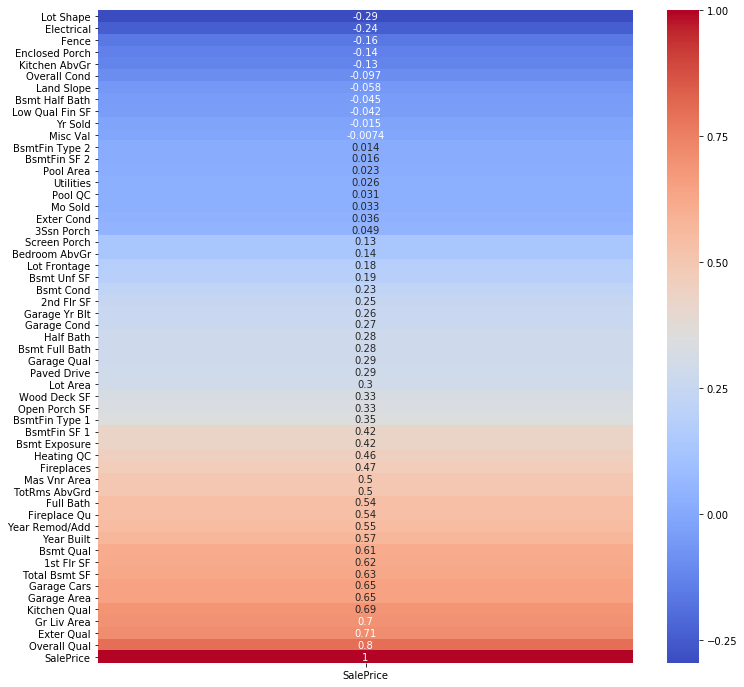

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice'), annot = True, cmap = 'coolwarm');

# Feature Engineering 

In [19]:
ames.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

Handling Outliers 

In [20]:
#Per the data dictionary, there are 5 outliers with Gr Liv Area > 4000
#I will create an outliers column- I don't want to remove them because the test data might have outliers 

ames["Outliers"] = (ames['Gr Liv Area'] >= 4000).astype(int)

kaggle_test_ames["Outliers"] = (kaggle_test_ames['Gr Liv Area'] >= 4000).astype(int)

print(ames['Outliers'].value_counts())
print(kaggle_test_ames['Outliers'].value_counts())

0    2049
1       2
Name: Outliers, dtype: int64
0    876
1      3
Name: Outliers, dtype: int64


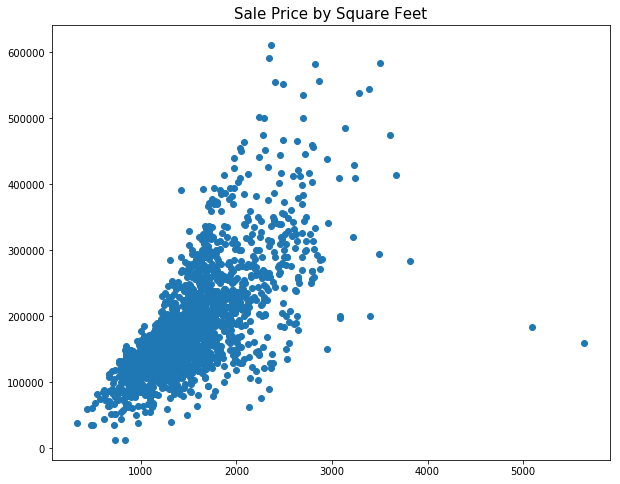

In [21]:
#Below I see the 2 outliers in the train data that are above 4000 sqft 

plt.figure(figsize= (10,8))
plt.scatter(ames['Gr Liv Area'], ames['SalePrice'])
plt.title('Sale Price by Square Feet', size= 15);

Dummy Columns 

In [22]:
#change nominal columns through get dummies (Here the NaNs were changed to "None")

ames = pd.get_dummies(data=ames, columns=['Garage Finish','Garage Type','Mas Vnr Type','MS Zoning'])
kaggle_test_ames = pd.get_dummies(data=kaggle_test_ames, columns=['Garage Finish','Garage Type','Mas Vnr Type','MS Zoning'])


In [23]:
# I still want to change the nominal columns that dont have NaNs in order to get more granular in the model  

ames = pd.get_dummies(data=ames, columns=['Street','MS SubClass', 'Land Contour','Lot Config','Condition 1',
                                          'Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
                                          'Exterior 1st','Exterior 2nd','Foundation','Heating', 'Central Air',
                                          'Sale Type','Functional'])

ames = pd.get_dummies(ames, columns=['Neighborhood'],drop_first=False) 

kaggle_test_ames = pd.get_dummies(data=kaggle_test_ames, columns=['Street','MS SubClass', 'Land Contour',
                                                                  'Lot Config','Condition 1','Condition 2',
                                                                  'Bldg Type','House Style','Roof Style','Roof Matl',
                                                                  'Exterior 1st','Exterior 2nd','Foundation','Heating', 
                                                                  'Central Air','Sale Type','Functional'])

kaggle_test_ames = pd.get_dummies(kaggle_test_ames, columns=['Neighborhood'],drop_first=False) 

In [24]:
#Check that all the new columns are in the data 
print(ames.columns)
print(kaggle_test_ames.columns)

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=235)
Index(['Id', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=225)


Check all the data one last time before plotting and modeling 

In [25]:
#Keep track of the number of columns 
print(ames.shape)
print(kaggle_test_ames.shape)

(2051, 235)
(879, 225)


In [26]:
#No Nulls!!!
print(ames.isna().sum().sum())
print(kaggle_test_ames.isna().sum().sum())

0
0


At this point, I am done with the data cleaning so I leave the original kaggle_test_ames data aside while I plot and create models on the train data  


# EDA & Plotting  

In [27]:
#Intial heat map
# plt.figure(figsize=(12,12))
# sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap = 'coolwarm');

<Figure size 864x864 with 0 Axes>

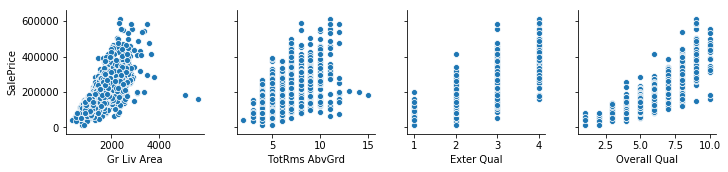

In [28]:
#Pair plot of relevant columns (based on heatmap above)
plt.figure(figsize=(12,12))
sns.pairplot(ames, 
             y_vars = 'SalePrice', 
             x_vars = ('Gr Liv Area', 'TotRms AbvGrd', 'Exter Qual', 'Overall Qual'));


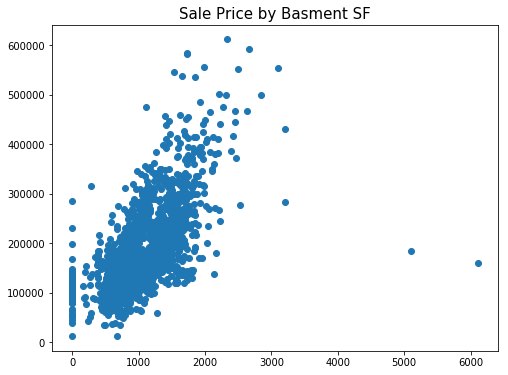

In [29]:
plt.figure(figsize= (8,6))
plt.scatter(ames['Total Bsmt SF'], ames['SalePrice'])
plt.title('Sale Price by Basment SF', size= 15);

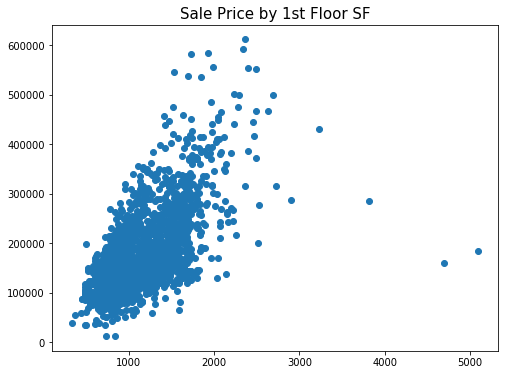

In [30]:
plt.figure(figsize= (8,6))
plt.scatter(ames['1st Flr SF'], ames['SalePrice'])
plt.title('Sale Price by 1st Floor SF', size= 15);

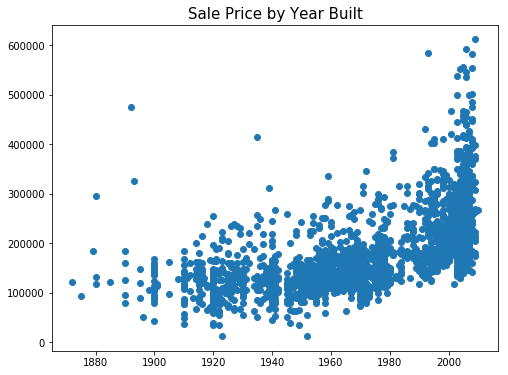

In [31]:
plt.figure(figsize= (8,6))
plt.scatter(ames['Year Built'], ames['SalePrice'])
plt.title('Sale Price by Year Built', size= 15);

# Set Target and Features 

In [32]:
#create target and features

features = [col for col in ames if col != 'SalePrice']        #this model uses all columns except for SalePrice 
X = ames[features]
y = ames['SalePrice']

In [33]:
#Check the data length 
print(X.shape)
print(y.shape)

(2051, 234)
(2051,)


In [34]:
#Make sure there are no Objects in the data before we instantiate and fit our model 
# ames.dtypes.sort_values()

# Train Test Split 

Since we created dummy columns, the columns in the train and kaggle test data may not aling. Since the test data is 
much smaller, there may be variables that don't exist in that data set. 

In [35]:
#Check the shape 
print(ames.shape)
print(kaggle_test_ames.shape)

(2051, 235)
(879, 225)


First, I align the columns that got lost in the dummies.

In [36]:
missing_cols = set(ames.columns) - set(kaggle_test_ames.columns)
for col in missing_cols:
    kaggle_test_ames[col] = 0
kaggle_test_ames_1 = kaggle_test_ames[ames.columns]

#Here, I renamed the data as kaggle_test_ames_1 because I don't want to override my file. 
#I will need the Id column from there in the future. 

Now we see that the number of columns align 

In [37]:
print(ames.shape)
print(kaggle_test_ames_1.shape)

(2051, 235)
(879, 235)


Now I can perform the train test split. 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [39]:
#check the split 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1538, 234)
(1538,)
(513, 234)
(513,)


# Standard Scalar

I will try to use a Ridge and Lasso model later on, so here I'm scaling my data in order to normalize the coefficient. 

In [40]:
#Scale
ss = StandardScaler()                       
ss.fit(X_train)                            
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [41]:
#Check the scaled data 
X_train_scaled

array([[ 0.79850511,  0.13110237,  0.71606454, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [ 1.44830956,  0.54044953,  0.71606454, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [ 0.06009097, -0.50789203,  0.71606454, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       ...,
       [ 0.59174915,  0.03397227,  0.71606454, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [-1.09183509, -1.49043579,  0.71606454, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [ 0.35545663, -0.15770762,  0.71606454, ..., -0.13862909,
        -0.14807738, -0.0808981 ]])

# Linear Regression Model

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
#Instantiate model
lr = LinearRegression()

#fit model
lr.fit(X_train_scaled, y_train)

#Find predictions 
predictions_lr = lr.predict(X_train_scaled)

#Find r2 score 
print(f'Linear r2 score: {r2_score(y_train, predictions_lr)}')

#Cross Validation of Train
print(f'Linear cross val score (train): {cross_val_score(lr, X_train_scaled, y_train, cv=kf).mean()}')

#Cross Validation of Test
print(f'Linear cross val score (test): {cross_val_score(lr, X_test_scaled, y_test, cv=kf).mean()}')

cross_val_score(lr, X_test_scaled, y_test, cv=5)

Linear r2 score: 0.9341281763574824
Linear cross val score (train): -9.555134666282815e+24
Linear cross val score (test): -4.278647960196218e+22


array([-9.44503448e+22, -1.06124957e+20, -1.44350940e+23, -4.67538956e+21,
       -7.01436330e+21])

In [44]:
#these cv scores look very odd. 
lr.score(X_test, y_test)

-6.508626757093468e+26

In [45]:
#the predictions seem to align with the y values so I will continue to test with Ridge and Lasso 
print(y_train[:10])
print(predictions_lr[:10])

532     167300
415     219000
273     129000
1460    328000
250     290000
413     139500
1340    139900
310     300000
1723    125200
585     160000
Name: SalePrice, dtype: int64
[194586.20449639 213277.07949639 129172.20449639 282229.70449639
 309791.95449639 147202.07949639 158117.82949639 286589.20449639
 136392.20449639 163116.95449639]


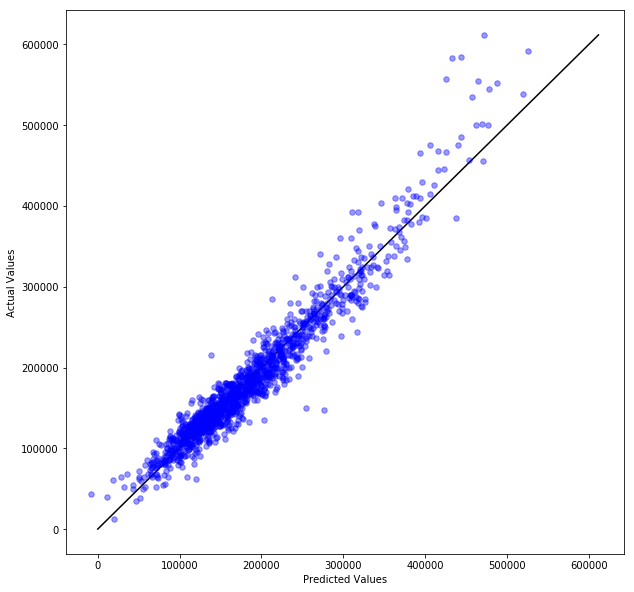

In [46]:
# Plot the linear model
plt.figure(figsize=(10,10))

# Generate a scatterplot of predicted vs actual 
plt.scatter(predictions_lr, y_train, s=30, c='b', zorder=10, alpha = 0.4)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')
plt.show();

# Ridge Model

In [47]:
#set up ridge reg
ridge = RidgeCV(cv=5)

#fit model
ridge.fit(X_train_scaled, y_train);

#Find predictions 
predictions_ridge = ridge.predict(X_train_scaled)

#Find ridge score of train
print(f'Ridge score train: {ridge.score(X_train_scaled, y_train)}')

#Find ridge score of test
print(f'Ridge score test: {ridge.score(X_test_scaled, y_test)}')

Ridge score train: 0.9340385167485193
Ridge score test: 0.9029543935046249


In [48]:
#The cross val scores of the ridge look much better 
print(cross_val_score(ridge, X_train_scaled, y_train, cv=5))
print(cross_val_score(ridge, X_train_scaled, y_train, cv=5).mean())

print(cross_val_score(ridge, X_test_scaled, y_test, cv=5))
print(cross_val_score(ridge, X_test_scaled, y_test, cv=5).mean())


[0.90535629 0.8795515  0.88825949 0.85610659 0.86971751]
0.879798274742749


/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0.88247064 0.87593044 0.90408802 0.85973187 0.88507747]
0.8814596869786728


/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


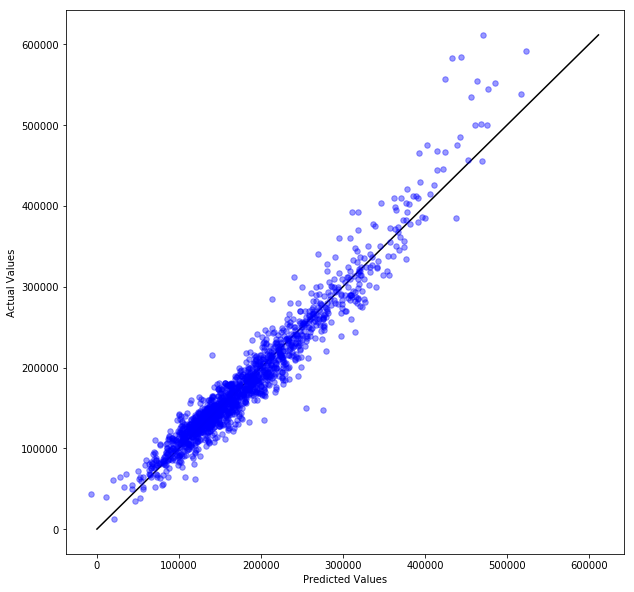

In [49]:
# Plot the ridge model
plt.figure(figsize=(10,10))

# Generate a scatterplot of predicted vs actual 
plt.scatter(predictions_ridge, y_train, s=30, c='b', zorder=10, alpha = 0.4)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')
plt.show();

# Lasso

In [50]:
#Instantiate lasso regression. Here I manuanlly changed the alpha to 
lasso = LassoCV(n_alphas=6)           

#fit model
lasso.fit(X_train_scaled, y_train)

#Find predictions 
predictions_lasso = lasso.predict(X_train_scaled)

#Find ridge score of train
print(f'Lasso score train: {lasso.score(X_train_scaled, y_train)}')

#Find ridge score of test
print(f'Lasso score test: {lasso.score(X_test_scaled, y_test)}')

Lasso score train: 0.9190089912084415
Lasso score test: 0.9107259714089293


/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [51]:
#Cross Val score 
print(cross_val_score(lasso, X_train_scaled, y_train, cv=5))
print(cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean())

print(cross_val_score(lasso, X_test_scaled, y_test, cv=5))
print(cross_val_score(lasso, X_test_scaled, y_test, cv=5).mean())

/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:

[0.89743627 0.89633233 0.89586106 0.82452596 0.88091423]


/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_de

0.87901397098686


/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:

[0.88363655 0.8895522  0.91342634 0.90543194 0.90507814]


/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8994250344065413


In [52]:
coef_dict = dict(zip(X, lasso.coef_))
coef_dict

{'Lot Frontage': 384.56593022144085,
 'Lot Area': 4931.916478479607,
 'Lot Shape': -0.0,
 'Utilities': 0.0,
 'Land Slope': -0.0,
 'Overall Qual': 12818.075532962957,
 'Overall Cond': 2947.9085746450132,
 'Year Built': 6263.749688306335,
 'Year Remod/Add': 1778.4472002736234,
 'Mas Vnr Area': 5174.021579330719,
 'Exter Qual': 7097.028565594748,
 'Exter Cond': 0.0,
 'Bsmt Qual': 0.0,
 'Bsmt Cond': -38.8894493812415,
 'Bsmt Exposure': 3925.2453443870554,
 'BsmtFin Type 1': 0.0,
 'BsmtFin SF 1': 9289.338616811983,
 'BsmtFin Type 2': 96.1119721233539,
 'BsmtFin SF 2': 307.46098160251057,
 'Bsmt Unf SF': -0.0,
 'Total Bsmt SF': 6744.720437111431,
 'Heating QC': 1295.2074370213368,
 'Electrical': 0.0,
 '1st Flr SF': 562.8798377858537,
 '2nd Flr SF': 0.0,
 'Low Qual Fin SF': -0.0,
 'Gr Liv Area': 23387.616183681224,
 'Bsmt Full Bath': 1051.8983338216528,
 'Bsmt Half Bath': 0.0,
 'Full Bath': 0.0,
 'Half Bath': 0.0,
 'Bedroom AbvGr': -185.6970657424495,
 'Kitchen AbvGr': -0.0,
 'Kitchen Qual': 

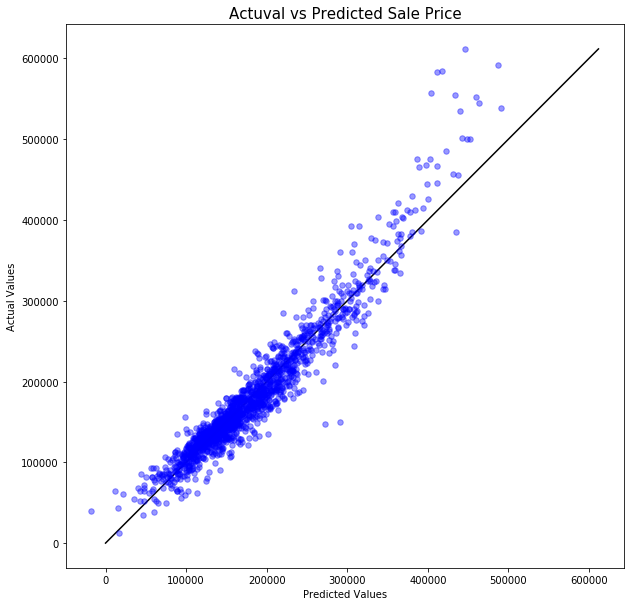

In [53]:
# Plot the lasso model
plt.figure(figsize=(10,10))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(predictions_lasso, y_train, s=30, c='b', zorder=10, alpha = 0.4)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actuval vs Predicted Sale Price", size = 15)

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')
plt.show();

# Predictions

Based on the scores above, I'm chosing to predict with my Lasso model. The difference between the train and test scores is the lowest out of all the models.

Now I have to scale the test data

In [54]:
ss_kaggle_test_ames_scaled = ss.transform(kaggle_test_ames_1[features])
#ss_kaggle_test_ames_scaled

/Users/ariellemiro/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


And generate predictions:

In [55]:
kaggle_predictions_lasso = lasso.predict(ss_kaggle_test_ames_scaled)
#kaggle_predictions_lasso

The last step is to convert the predictions into a dataframe. This is where I map the Id column from the test data to the predictions. 

In [56]:
#also convert predictions to dataframe
pd.DataFrame({'Id': list(kaggle_test_ames['Id']), 'SalePrice': abs(kaggle_predictions_lasso)}).head()

,Id,SalePrice
0,2658,141408.135532
1,2718,166040.117258
2,2414,230032.605673
3,1989,116652.781654
4,625,176904.861508


# Submission

In [58]:
#Submission for kaggle. Save the code from above. 

submission = pd.DataFrame({'Id': list(kaggle_test_ames['Id']), 'SalePrice': kaggle_predictions_lasso})
 
#Check submission shape (should be 879,2)
print(submission.shape)

#Export to csv and drop the index column 
submission.to_csv('./kaggle submissions/submission_final.csv', index=False)

(879, 2)
